[[0.0, 1.4, 1000.0], [0.0, 1.4, 2000.0], [0.0, 1.4, 3000.0], [0.0, 1.4, 4000.0], [0.0, 1.4, 5000.0], [0.0, 1.4, 6000.0], [0.0, 1.4, 7000.0], [0.0, 1.4, 8000.0], [0.0, 1.4, 9000.0], [0.0, 1.4, 10000.0], [0.0, 1.4, 11000.0], [0.0, 1.4, 12000.0], [0.0, 1.4, 13000.0], [0.0, 1.4, 14000.0], [0.0, 1.4, 15000.0], [0.0, 1.4, 16000.0], [0.0, 1.4, 17000.0], [0.0, 1.4, 18000.0], [0.0, 1.4, 19000.0], [0.0, 1.4, 20000.0], [0.0, 1.4, 21000.0], [0.0, 1.4, 22000.0], [0.0, 1.4, 23000.0], [0.0, 1.4, 24000.0], [0.0, 1.4, 25000.0], [0.0, 1.4, 26000.0], [0.0, 1.4, 27000.0], [0.0, 1.4, 28000.0], [0.0, 1.4, 29000.0], [0.0, 1.4, 30000.0], [0.0, 1.4, 31000.0], [0.0, 1.4, 32000.0], [0.0, 1.4, 33000.0], [0.0, 1.4, 34000.0], [0.0, 1.4, 35000.0], [0.0, 1.4, 36000.0], [0.0, 1.4, 37000.0], [0.0, 1.4, 38000.0], [0.0, 1.4, 39000.0], [0.0, 1.4, 40000.0], [0.0, 1.4, 41000.0], [0.0, 1.4, 42000.0], [0.0, 1.4, 43000.0], [0.0, 1.4, 44000.0], [0.0, 1.4, 45000.0], [0.0, 1.4, 46000.0], [0.0, 1.4, 47000.0], [0.0, 1.4, 48000.0], 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

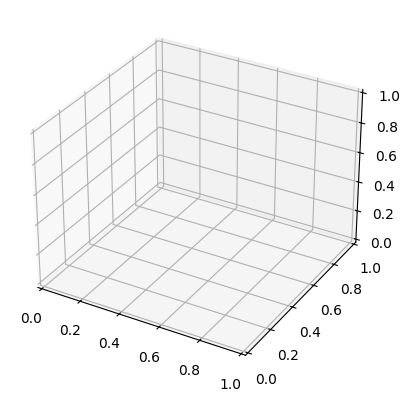

In [78]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

avg_file = "avg.csv"
min_file = "min.csv"
max_file = "max.csv"

parameters = list()
res_avg = list()

with open(avg_file, "r") as avg_f:
    avg_lines = avg_f.readlines()[1:]
    for line in avg_lines:
        parameters.append([float(e) for e in line.split(",")[:3]])
        res_avg.append([float(e) for e in line.split(",")])
parameters.sort()
res_avg.sort(key=lambda x: [x[0], x[1], x[2]])
print(parameters)

def gen_graphs(res: list, prefix: str):
    mse_eta_sigma = [[e[0], e[1], e[3]] for e in res if e[2] == 30000]
    esp_eta_sigma = [[e[0], e[1], e[4]] for e in res if e[2] == 30000]

    mse_eta_n = [[e[0], e[2], e[3]] for e in res if e[1] == 1.4]
    esp_eta_n = [[e[0], e[2], e[4]] for e in res if e[1] == 1.4]

    mse_sigma_n = [[e[1], e[2], e[3]] for e in res if e[0] == 0.05]
    esp_sigma_n = [[e[1], e[2], e[4]] for e in res if e[0] == 0.05]

    x = [e[0] for e in mse_eta_sigma]
    x = np.array(list(set(x)))
    y = [e[1] for e in mse_eta_sigma]
    y = np.array(list(set(y)))
    z = [e[2] for e in mse_eta_sigma]
    print(f"LZ {len(z)}")
    nz = list()
    for i in range(len(x) + 1):
        nz.append(z[len(x) * i:len(x) * (i+1)])
    print(f"NZ {nz}")
    x,y = np.meshgrid(x,y)

    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    ls = LightSource(270, 45)
    z_array = np.array(nz)
    print(f"X {x}\nY {y}")
    print(len(z_array))
    print(len(x))
    print(len(y))
    rgb = ls.shade(z_array, cmap=cm.get_cmap())#, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(x, y, z_array, rstride=1, cstride=1, facecolors=rgb,linewidth=0,antialiased=False,shade=False)
    plt.show()

dem = cbook.get_sample_data('jacksboro_fault_dem.npz')
z = dem['elevation']
print(z)
z = z[np.s_[5:50, 5:50]]
print(z)
gen_graphs(res_avg, "test")

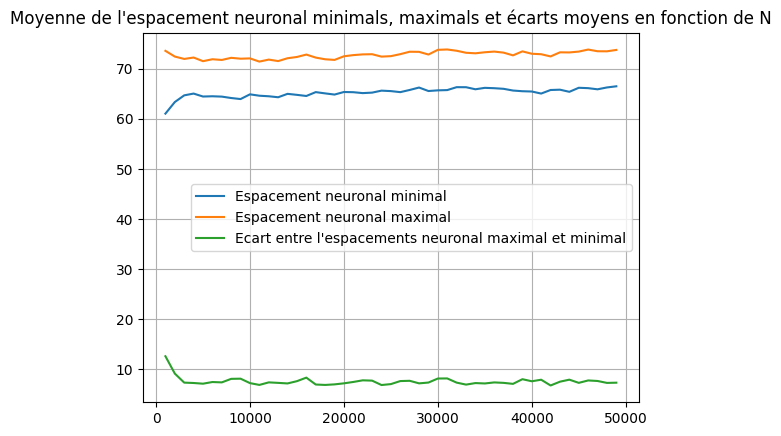

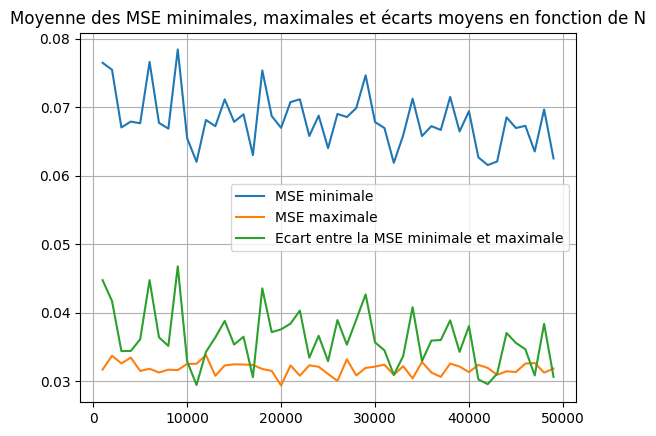

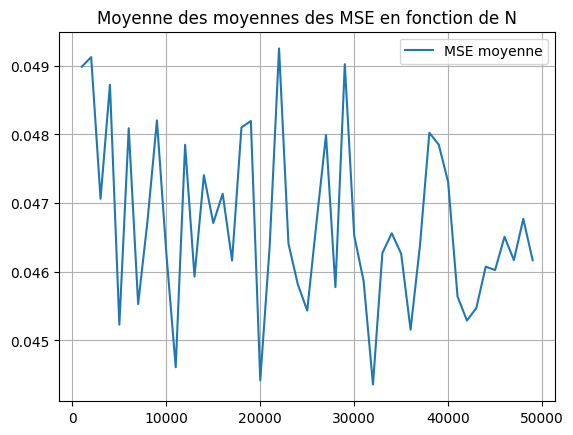

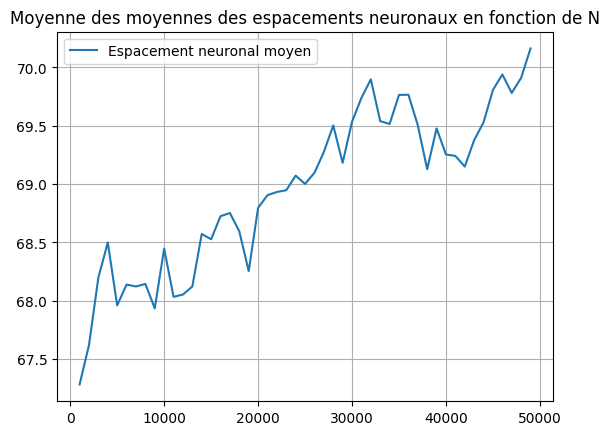

In [77]:
min_tab_mse = dict()
min_tab_esp = dict()

with open("min.csv", "r") as f:
    lines = f.readlines()[1:]
    for line in lines:
        n =  line.split(",")[2]
        if n not in min_tab_mse:
            min_tab_mse[n] = []
        if n not in min_tab_esp:
            min_tab_esp[n] = []

        min_tab_esp[n].append(float(line.split(",")[4]))
        min_tab_mse[n].append(float(line.split(",")[3]))
        parameters.append([float(e) for e in line.split(",")[:3]])
        res_avg.append([float(e) for e in line.split(",")])

f_min_tab_mse = dict()
f_min_tab_esp = dict()
for key, value in min_tab_mse.items():
    f_min_tab_mse[key] = sum(value) / len(value)
for key, value in min_tab_esp.items():
    f_min_tab_esp[key] = sum(value) / len(value)

max_tab_mse = dict()
max_tab_esp = dict()

with open("max.csv", "r") as f:
    lines = f.readlines()[1:]
    for line in lines:
        n =  line.split(",")[2]
        if n not in max_tab_mse:
            max_tab_mse[n] = []
        if n not in max_tab_esp:
            max_tab_esp[n] = []

        max_tab_esp[n].append(float(line.split(",")[4]))
        max_tab_mse[n].append(float(line.split(",")[3]))
        parameters.append([float(e) for e in line.split(",")[:3]])
        res_avg.append([float(e) for e in line.split(",")])

f_max_tab_mse = dict()
f_max_tab_esp = dict()
for key, value in max_tab_mse.items():
    f_max_tab_mse[key] = sum(value) / len(value)
for key, value in max_tab_esp.items():
    f_max_tab_esp[key] = sum(value) / len(value)

avg_tab_mse = dict()
avg_tab_esp = dict()

with open("avg.csv", "r") as f:
    lines = f.readlines()[1:]
    for line in lines:
        n =  line.split(",")[2]
        if n not in avg_tab_mse:
            avg_tab_mse[n] = []
        if n not in avg_tab_esp:
            avg_tab_esp[n] = []

        avg_tab_esp[n].append(float(line.split(",")[4]))
        avg_tab_mse[n].append(float(line.split(",")[3]))
        parameters.append([float(e) for e in line.split(",")[:3]])
        res_avg.append([float(e) for e in line.split(",")])

f_avg_tab_mse = dict()
f_avg_tab_esp = dict()
for key, value in avg_tab_mse.items():
    f_avg_tab_mse[key] = sum(value) / len(value)
for key, value in avg_tab_esp.items():
    f_avg_tab_esp[key] = sum(value) / len(value)

import matplotlib.pyplot as plt

ns = [float(e) for e in list(f_min_tab_esp.keys())]

plt.plot(ns, list(f_min_tab_esp.values()), label="Espacement neuronal minimal")
plt.plot(ns, list(f_max_tab_esp.values()), label="Espacement neuronal maximal")
plt.plot(ns, [ma - mi for ma, mi in zip(f_max_tab_esp.values(), f_min_tab_esp.values())], label="Ecart entre l'espacements neuronal maximal et minimal")
plt.grid(True)
plt.title("Moyenne de l'espacement neuronal minimals, maximals et écarts moyens en fonction de N")
plt.legend()
plt.show()
plt.plot(ns, list(f_max_tab_mse.values()), label="MSE minimale")
plt.plot(ns, list(f_min_tab_mse.values()), label="MSE maximale")
plt.plot(ns, [ma - mi for ma, mi in zip(f_max_tab_mse.values(), f_min_tab_mse.values())], label="Ecart entre la MSE minimale et maximale")
plt.grid(True)
plt.legend()
plt.title("Moyenne des MSE minimales, maximales et écarts moyens en fonction de N")
plt.show()
plt.plot(ns, list(f_avg_tab_mse.values()), label="MSE moyenne")
plt.grid(True)
plt.legend()
plt.title("Moyenne des moyennes des MSE en fonction de N")
plt.show()
plt.plot(ns, list(f_avg_tab_esp.values()), label="Espacement neuronal moyen")
plt.grid(True)
plt.legend()
plt.title("Moyenne des moyennes des espacements neuronaux en fonction de N")
plt.show()

R True
{(0.05, 30000): [(0.1, 138.50554609411256), (0.2, 187.09923943490168), (0.3, 89.30587892740586), (0.4, 36.70002775470398), (1.0, 31.245210719026794), (1.4, 28.671627127723816), (2.0, 25.29216313722372), (3.0, 20.261343462780086), (4.0, 16.160104666632854)], (0.05, 49000): [(0.1, 168.96696244729446), (0.2, 188.69580941125008), (0.3, 78.12146144642279), (0.4, 36.78661717540983), (1.0, 31.259259067482105), (1.4, 28.533438027441257), (2.0, 25.27217482970627), (3.0, 20.28411869784518), (4.0, 16.19457564695186)], (0.5, 30000): [(0.1, 187.95468590553634), (0.2, 190.25443807302153), (0.3, 88.36136774302467), (0.4, 39.261926849173896), (1.0, 31.624177958876338), (1.4, 28.869312867408507), (2.0, 25.486559931236098), (3.0, 21.228243296989724), (4.0, 17.20133490703301)], (0.5, 49000): [(0.1, 195.32850653660572), (0.2, 190.9668830047051), (0.3, 85.4174440049562), (0.4, 39.26749726059612), (1.0, 31.971269570520526), (1.4, 28.77037186954984), (2.0, 25.66940582372675), (3.0, 19.836095647925195)

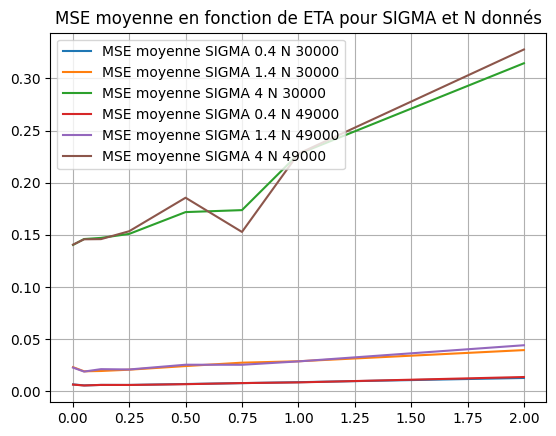

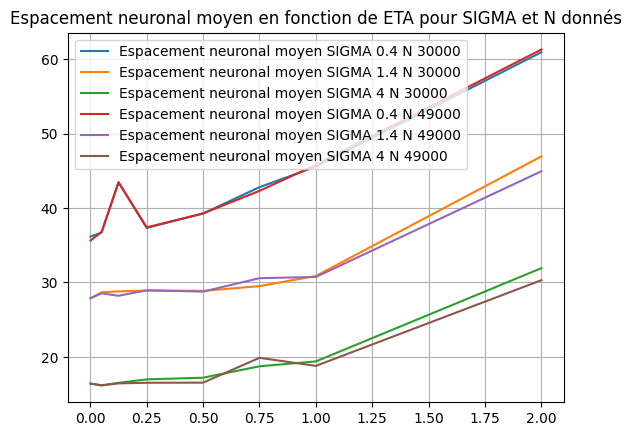

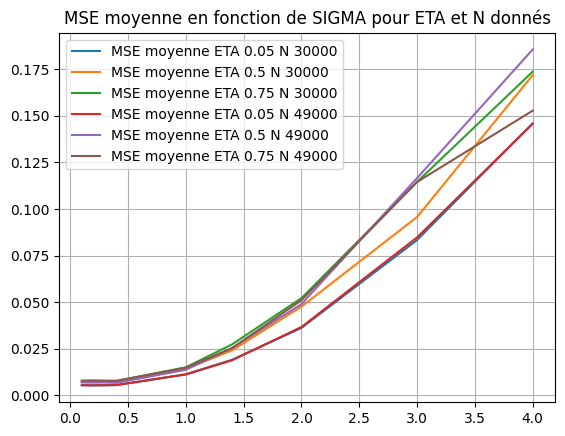

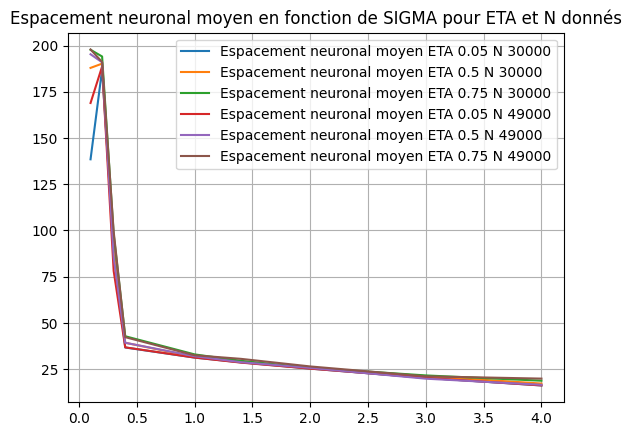

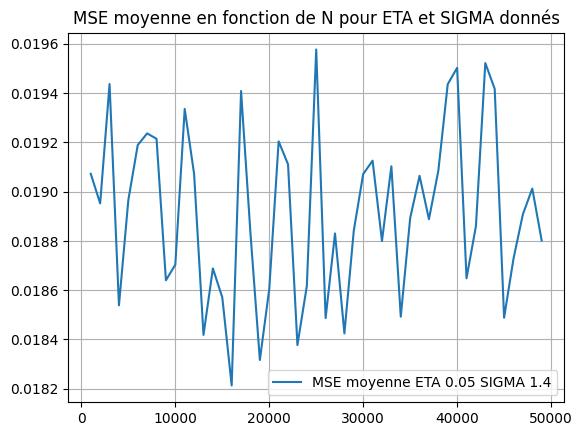

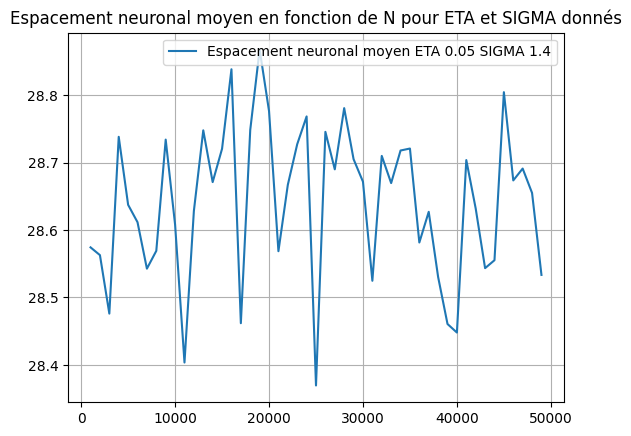

In [81]:
eta1 = 0.05
eta2 = 0.5
eta3 = 0.75
sigma1 = 0.4
sigma2 = 1.4
sigma3 = 4
n1 = 30000
n2 = 49000

tab_mse = {
    (eta1, n1): [],
    (eta1, n2): [],
    (eta2, n1): [],
    (eta2, n2): [],
    (eta3, n1): [],
    (eta3, n2): [],
    (sigma1, n1): [],
    (sigma1, n2): [],
    (sigma2, n1): [],
    (sigma2, n2): [],
    (sigma3, n1): [],
    (sigma3, n2): [],
    (eta1, sigma2): [],
}
tab_esp = {
    (eta1, n1): [],
    (eta1, n2): [],
    (eta2, n1): [],
    (eta2, n2): [],
    (eta3, n1): [],
    (eta3, n2): [],
    (sigma1, n1): [],
    (sigma1, n2): [],
    (sigma2, n1): [],
    (sigma2, n2): [],
    (sigma3, n1): [],
    (sigma3, n2): [],
    (eta1, sigma2): [],
}

p = []

r = []

with open("avg.csv", "r") as f:
    lines = f.readlines()[1:]
    for line in lines:
        split = line.split(",")
        split = [float(e) for e in split]
        p.append([split[0], split[1], split[2]])
        r.append((split[0], split[2]) in tab_mse)
        r.append((split[1], split[2]) in tab_mse)
        if (split[0], split[2]) in tab_mse:
            # print("ETA")
            # print((split[3], split[4]))
            tab_mse[(split[0], split[2])].append((split[1], split[3]))
            tab_esp[(split[0], split[2])].append((split[1], split[4]))
            # print(tab_mse)
            # print(tab_esp)
        if (split[1], split[2]) in tab_mse:
            # print("SIGMA")
            # print((split[3], split[4]))
            tab_mse[(split[1], split[2])].append((split[0], split[3]))
            tab_esp[(split[1], split[2])].append((split[0], split[4]))
            # print(tab_mse)
            # print(tab_esp)
        if (split[0], split[1]) in tab_mse:
            # print("SIGMA")
            # print((split[3], split[4]))
            tab_mse[(split[0], split[1])].append((split[2], split[3]))
            tab_esp[(split[0], split[1])].append((split[2], split[4]))
            # print(tab_mse)
            # print(tab_esp)

for v in tab_esp.values():
    v.sort(key = lambda e: e[0])
for v in tab_mse.values():
    v.sort(key = lambda e: e[0])
print(f"R {any(r)}")
print(tab_esp)
print(tab_mse)
print(f"ETAS : {set([e[0] for e in p])}")
print(f"SIGMAS : {set([e[1] for e in p])}")
print(f"NS : {set([e[2] for e in p])}")

etas = [e[0] for e in tab_mse[(sigma1, n1)]]
sigmas = [e[0] for e in tab_mse[(eta1, n1)]]
ns = [e[0] for e in tab_mse[(eta1, sigma2)]]


print(f"MSE : {etas}\n{[e[1] for e in tab_mse[(sigma1, n1)]]}")
print(f"ESP : {etas}\n{[e[1] for e in tab_mse[(sigma1, n1)]]}")
print(tab_mse)
plt.plot(etas, [e[1] for e in tab_mse[(sigma1, n1)]], label=f"MSE moyenne SIGMA {sigma1} N {n1}")
plt.plot(etas, [e[1] for e in tab_mse[(sigma2, n1)]], label=f"MSE moyenne SIGMA {sigma2} N {n1}")
plt.plot(etas, [e[1] for e in tab_mse[(sigma3, n1)]], label=f"MSE moyenne SIGMA {sigma3} N {n1}")
plt.plot(etas, [e[1] for e in tab_mse[(sigma1, n2)]], label=f"MSE moyenne SIGMA {sigma1} N {n2}")
plt.plot(etas, [e[1] for e in tab_mse[(sigma2, n2)]], label=f"MSE moyenne SIGMA {sigma2} N {n2}")
plt.plot(etas, [e[1] for e in tab_mse[(sigma3, n2)]], label=f"MSE moyenne SIGMA {sigma3} N {n2}")
plt.grid(True)
plt.title("MSE moyenne en fonction de ETA pour SIGMA et N donnés")
plt.legend()
plt.show()
plt.plot(etas, [e[1] for e in tab_esp[(sigma1, n1)]], label=f"Espacement neuronal moyen SIGMA {sigma1} N {n1}")
plt.plot(etas, [e[1] for e in tab_esp[(sigma2, n1)]], label=f"Espacement neuronal moyen SIGMA {sigma2} N {n1}")
plt.plot(etas, [e[1] for e in tab_esp[(sigma3, n1)]], label=f"Espacement neuronal moyen SIGMA {sigma3} N {n1}")
plt.plot(etas, [e[1] for e in tab_esp[(sigma1, n2)]], label=f"Espacement neuronal moyen SIGMA {sigma1} N {n2}")
plt.plot(etas, [e[1] for e in tab_esp[(sigma2, n2)]], label=f"Espacement neuronal moyen SIGMA {sigma2} N {n2}")
plt.plot(etas, [e[1] for e in tab_esp[(sigma3, n2)]], label=f"Espacement neuronal moyen SIGMA {sigma3} N {n2}")
plt.grid(True)
plt.title("Espacement neuronal moyen en fonction de ETA pour SIGMA et N donnés")
plt.legend()
plt.show()

plt.plot(sigmas, [e[1] for e in tab_mse[(eta1, n1)]], label=f"MSE moyenne ETA {eta1} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_mse[(eta2, n1)]], label=f"MSE moyenne ETA {eta2} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_mse[(eta3, n1)]], label=f"MSE moyenne ETA {eta3} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_mse[(eta1, n2)]], label=f"MSE moyenne ETA {eta1} N {n2}")
plt.plot(sigmas, [e[1] for e in tab_mse[(eta2, n2)]], label=f"MSE moyenne ETA {eta2} N {n2}")
plt.plot(sigmas, [e[1] for e in tab_mse[(eta3, n2)]], label=f"MSE moyenne ETA {eta3} N {n2}")
plt.grid(True)
plt.title("MSE moyenne en fonction de SIGMA pour ETA et N donnés")
plt.legend()
plt.show()
plt.plot(sigmas, [e[1] for e in tab_esp[(eta1, n1)]], label=f"Espacement neuronal moyen ETA {eta1} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_esp[(eta2, n1)]], label=f"Espacement neuronal moyen ETA {eta2} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_esp[(eta3, n1)]], label=f"Espacement neuronal moyen ETA {eta3} N {n1}")
plt.plot(sigmas, [e[1] for e in tab_esp[(eta1, n2)]], label=f"Espacement neuronal moyen ETA {eta1} N {n2}")
plt.plot(sigmas, [e[1] for e in tab_esp[(eta2, n2)]], label=f"Espacement neuronal moyen ETA {eta2} N {n2}")
plt.plot(sigmas, [e[1] for e in tab_esp[(eta3, n2)]], label=f"Espacement neuronal moyen ETA {eta3} N {n2}")
plt.grid(True)
plt.title("Espacement neuronal moyen en fonction de SIGMA pour ETA et N donnés")
plt.legend()
plt.show()

plt.plot(ns, [e[1] for e in tab_mse[(eta1, sigma2)]], label=f"MSE moyenne ETA {eta1} SIGMA {sigma2}")
plt.grid(True)
plt.title("MSE moyenne en fonction de N pour ETA et SIGMA donnés")
plt.legend()
plt.show()
plt.plot(ns, [e[1] for e in tab_esp[(eta1, sigma2)]], label=f"Espacement neuronal moyen ETA {eta1} SIGMA {sigma2}")
plt.grid(True)
plt.title("Espacement neuronal moyen en fonction de N pour ETA et SIGMA donnés")
plt.legend()
plt.show()